UNAD

Ivan Ramiro Quiroga

Agrupamiento en K-means

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

Vista general del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Non

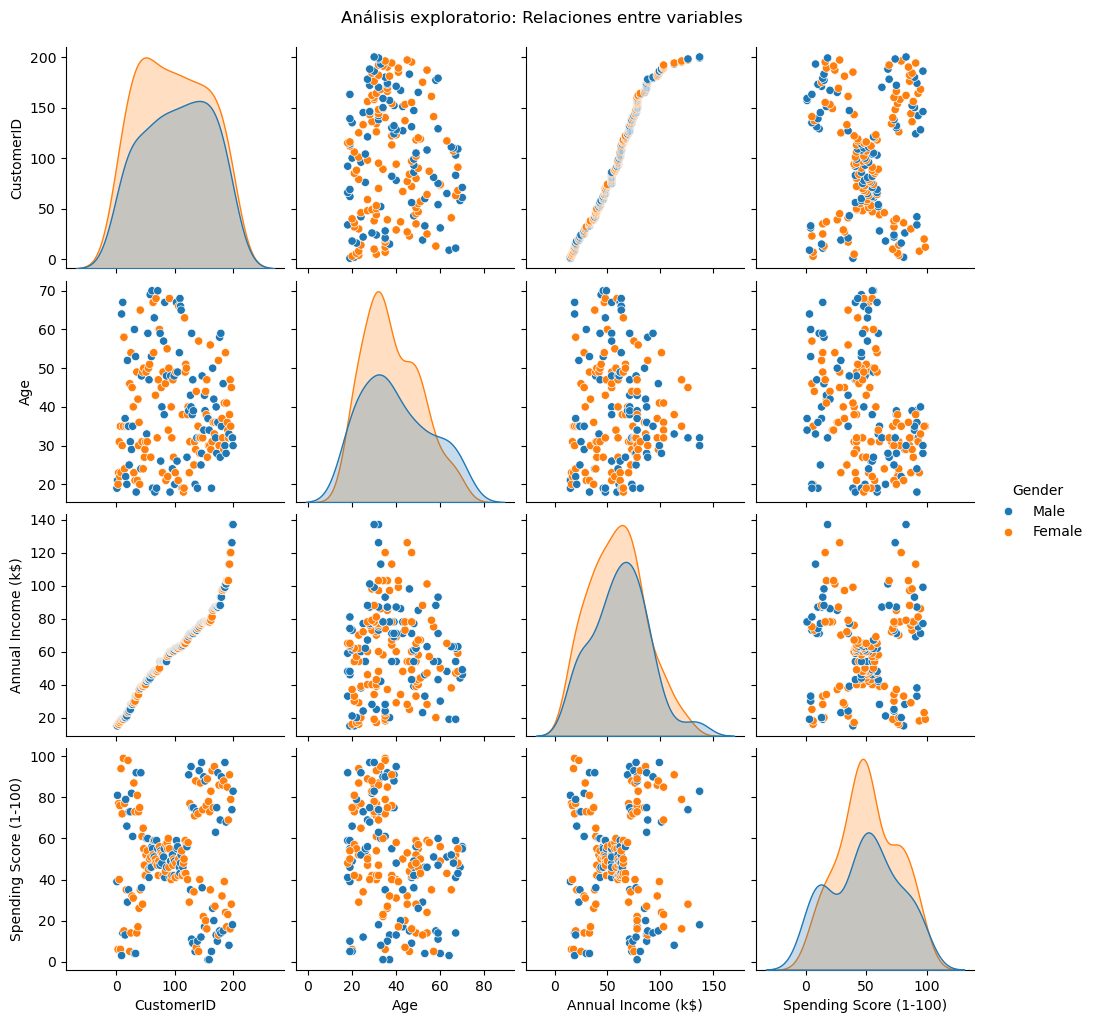

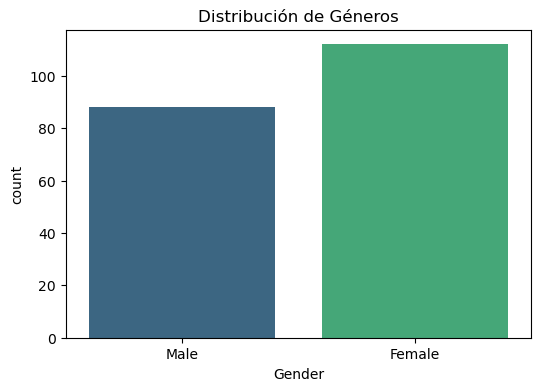

In [3]:
# Importación de librerías necesarias
import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score


os.environ["OMP_NUM_THREADS"] = "1"

# Carga y análisis exploratorio de los datos
# Cargar el archivo CSV
df = pd.read_csv('Mall_Customers.csv')

# Mostrar las primeras filas del dataset
print("Vista general del dataset:")
print(df.head())

# Información del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística
print("\nDescripción estadística:")
print(df.describe())

# Visualización de la distribución de las variables numéricas
sns.pairplot(df, diag_kind='kde', hue='Gender')
plt.suptitle("Análisis exploratorio: Relaciones entre variables", y=1.02)
plt.show()

# Visualización de la distribución de géneros
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='viridis', hue='Gender', dodge=False, legend=False)
plt.title('Distribución de Géneros')
plt.show()

2.Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.

In [4]:
# Preprocesamiento de los datos
# Codificación de variables categóricas
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Escalado de variables numéricas
scaler = StandardScaler()
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nDatos después del preprocesamiento:")
print(df.head())


Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Datos después del preprocesamiento:
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       1 -1.424569           -1.738999               -0.434801
1           2       1 -1.281035           -1.738999                1.195704
2           3       0 -1.352802           -1.700830               -1.715913
3           4       0 -1.137502           -1.700830                1.040418
4           5       0 -0.563369           -1.662660               -0.395980


3.Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 

In [5]:
# Selección de características relevantes
# Seleccionamos 'Annual Income (k$)' y 'Spending Score (1-100)' como características relevantes
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

4.Entrenar el modelo configurando los diferentes 
hiperparámetros. 

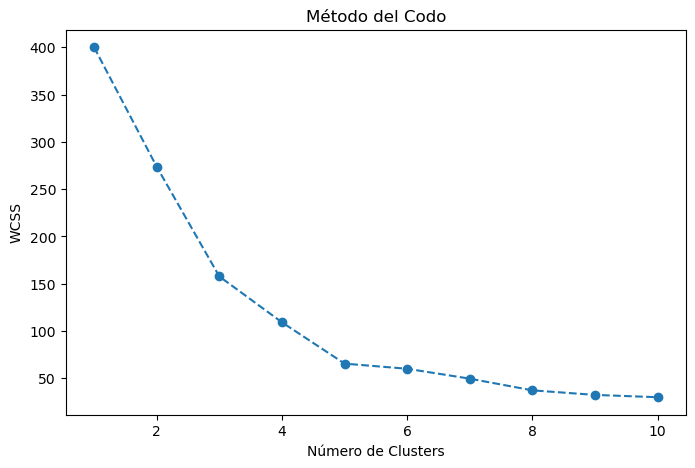

In [6]:
# Entrenamiento del modelo K-means
# Determinar el número óptimo de clusters usando el método del codo
wcss = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Selección del número de clusters
optimal_clusters = 5

# Entrenamiento del modelo con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

# Agregar la información de clusters al dataset
df['Cluster'] = clusters


5.Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 

In [7]:
# Evaluación del modelo
silhouette_avg = silhouette_score(features, clusters)
calinski_harabasz = calinski_harabasz_score(features, clusters)

print(f"\nCoeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")


Coeficiente de Silhouette: 0.5546571631111091
Índice de Calinski-Harabasz: 248.64932001536357


6.Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo. 

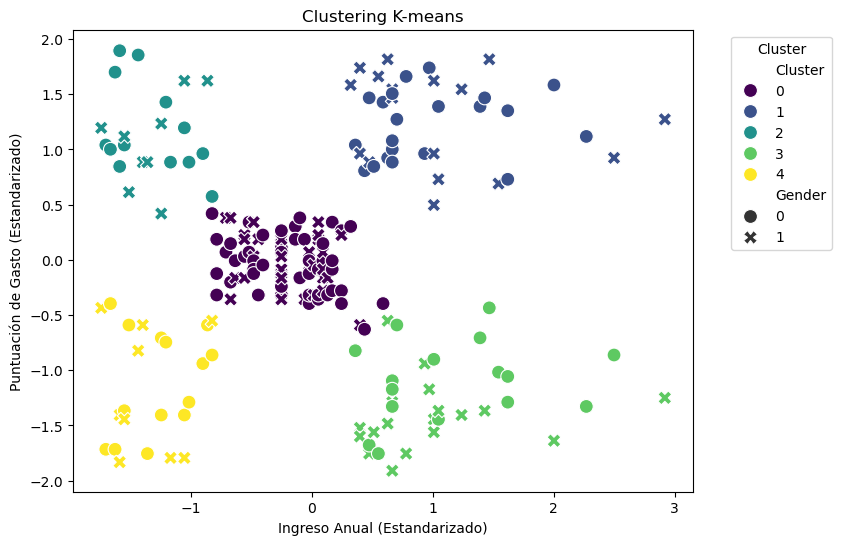

In [8]:
# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features['Annual Income (k$)'], 
    y=features['Spending Score (1-100)'], 
    hue=df['Cluster'], 
    palette='viridis', 
    style=df['Gender'], 
    s=100
)
plt.title('Clustering K-means')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntuación de Gasto (Estandarizado)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


7.Interpretar, analizar y documentar los resultados obtenidos.

In [9]:
# Documentación e interpretación
print("\nInterpretación de los resultados:")
print("El modelo K-means logró identificar clusters basados en los ingresos anuales y el puntaje de gasto.")
print("El Coeficiente de Silhouette y el Índice de Calinski-Harabasz indican la calidad del agrupamiento.")



Interpretación de los resultados:
El modelo K-means logró identificar clusters basados en los ingresos anuales y el puntaje de gasto.
El Coeficiente de Silhouette y el Índice de Calinski-Harabasz indican la calidad del agrupamiento.
